In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import json
import pdb

from utils import create_dict, create_list, get_data, find_type2_locations, find_type3_locations, find_type4_locations
from utils import applyArtifacts, removeCells, avg_firing, NumpyEncoder, avg_amplitude, nrActiveCells, div_avg_firing, div_avg_amplitude, top_least
from utils import cellID, spindle_locs, search_spindle, spi_inOut_diff, zscore_calculator
from Analyses_ import slo_spi
%config Completer.use_jedi = False

### Input informations

In [2]:
all_address = ['L:/analysis_nima/250520_m18a/Batch_4', 'L:/analysis_nima/290520_m17a/Batch/extracells/Batch_2',
                'L:/analysis_nima/110620_m18b/new/Batch_3', 'L:/analysis_nima/050820_m21a/Batch_4',
                'L:/analysis_nima/030720_m20a/Batch_3', 'L:/analysis_nima/291020_m23a/Batch_2', 
               'L:/analysis_nima/210121_m24a/Batch_1']


# sampling rate for different mice
sfs = [30.995, 30.995, 30.955, 30.995, 30.995, 30.9576, 30.995]

# defining artifacts
custom_artifacts_1 = [[11007,11008,4]]
custom_artifacts_2 = [[11630,11947,0],[12000,12700,0],[4533,5154,14]]
custom_artifacts_3 = []
custom_artifacts_4 = [[1595,1845,0],[4609,4907,0],[7740,7983,0],[13795,14101,0],[16706,16973,0],
             [7266,7501,1],[11912,12219,1],[12703,13203,1],[13730,13909,1],[15097,15559,1],[17277,17519,1],
             [1416,1793,2],[3816,4123,2],[13254,13593,2],[15224,15703,2],[17668,18067,2],
             [7358,7521,3],[10240,10253,3],[13672,13748,3],[17306,17593,3],
             [5505,5939,4],[6222,6231,4],[16760,16820,4],[18450,18573,4],                           
             [1132,1357,7],[8653,8776,7],[9946,10391,7],
             [9068,9323,7],[13589,13623,7],[17394,17547,7],
             [1,140,8],[908,965,8],[7638,7665,8],[8014,8027,8],[14726,14922,8],[18022,18187,8],
             [1912,2381,9],[2920,2923,9],[7767,7819,9],[7864,7997,9],[9876,10197,9],[15206,15545,9],
             [6734,7220,10],[9668,9939,10],
             [8914,9290,11],[9562,9571,11],[12216,12339,11],
             [11492,11553,12],[13898,13919,12],
             [6298,6619,13],[12282,12795,13],[14406,14507,13],[14798,14875,13],
             [1,220,14],[1878,2108,14],[9872,9961,14],
             [4764,4813,15],[5564,5571,15],[15419,15595,15],[16003,16089,15],[16420,16482,15],
             [4240,4403,16],[9975,10077,16],[10274,10275,16],[13228,13451,16],[13805,13939,16],[14620,14664,16],[15764,15857,16],[18430,18537,16],
             [10425,10591,17],[11058,11709,17],[12232,12311,17],[12784,12804,17],[17000,17115,17],
             [10655,10825,18],[11993,12075,18],[12648,12685,18],[16013,16134,18],
             [14466,15015,19],[16876,17009,19],[18398,18573,19],
            [628,958,23],[7822,7976,23],[10298,10435,23],[13899,14241,23],[14466,14537,23],[15773,15848,23],[17664,17925,23],[18291,18426,23],
            [4309,4512,24],[5271,5467,24],[6450,6700,24],[7186,7593,24],
            [460,700,25],[1714,1725,25],[4045,4153,25],[13600,13699,25],
            [4434,4568,26],[5984,6167,26],
            [1770,1831,27],[4060,4064,27],
            [2000,2193,28],[11098,11334,28],
            [5921,5997,30],[8200,8210,30],[9189,9191,30],
            [686,852,31],[13375,13543,31],[14059,14334,31],[15808,15883,31],
            [10760,10800,33],[13942,14061,33],[17672,17738,33],
            [10576,10604,41]]
custom_artifacts_5 = [[3928,3971,0],[4584,4656,0],[7001,7119,0],[14144,14230,0],[14466,14501,0],[15591,15593,0],
            [559,603,1],[2187,2214,1],[3999,4054,1],[11749,11790,1],[17785,17839,1],
            [3403,3491,2],[11936,11980,2],
            [1397,1465,3],[13881,13889,3],[14510,14526,3],[18377,18441,3],                                                                                           
            [2585,2635,4], [6722,6771,4],[10867,10897,4],[16543,16615,4],
            [740,825,5],[2026,2113,5],[13025,13051,5],
            [798,863,6],[1795,1857,6],[3949,3980,6],[5190,5244,6],[10480,10547,6],[11219,11301,6],[12144,12191,6],[12690,12747,6],
            [1343,1441,7],[2618,2684,7],[2709,2713,7],[3427,3496,7],[4138,4185,7],[4532,4567,7],[5694,8768,7],[9513,9562,7],[12510,12644,7],[15000,15073,7],
            [96,140,8],[4175,4258,8],
            [409,564,9],[13291,13497,9],[16520,18573,9],
            [9968,10026,10],[14269,14335,10],[16569,16616,10],
            [404,557,11],[12553,12649,11],
            [503,598,13],[2832,2889,13],[13151,13218,13],[18276,18343,13],
            [769,954,14],[980,1001,14],[2324,2389,14],[4286,4297,14],
            [3349,3447,15],[6128,6221,15],
            [8475,8543,16],
            [9792,9840,17],
            [2984,3007,20],[4131,4183,20],[5025,5042,20],[6330,6355,20],[11818,11893,20],
            [6760,6875,21],
            [12871,12895,28],[13645,13667,28],[14232,14319,28],[14837,14849,28],[15521,15542,28],[16421,16445,28],[17032,17040,28]]
custom_artifacts_6 = [[8863,9191,4],
           [5389,5393,7],[5575,5607,7],[5754,5755,7],[5798,6000,7],
            [11050,11070,10],[12260,12280,10],
            [15125,15290,12],[16420,18160,10],
            [13280,13340,13],
            [8,23,15],[92,94,15],[481,505,15],
            [10035,10500,20],[11024,11044,20],
            [5794,5800,21],
            [3501,3507,22]]
custom_artifacts_7 = [[0,3418,0],[13116,13507,0],[14502,14872,0],
              [8000,9000,2],
              [1828,2638,3],[8631,12630,3],
              [1497,1988,4],[16470,17270,4],
              [5113,8239,5],                                                                                         
              [2322,2978,6],
              [12460,14890,7],
              [15600,16060,10],
              [4231,4848,11],[6434,6909,11],[9110,11550,11],
              [11890,12380,12],
              [8410,8820,13],
              [3026,3515,14],[13810,14170,14],
              [10910,12010,15]]  
artifacts = [custom_artifacts_1, custom_artifacts_2, custom_artifacts_3,
                custom_artifacts_4, custom_artifacts_5, custom_artifacts_6, custom_artifacts_7]

# cell removal 
remove_cell_1 = []
remove_cell_2 = []
remove_cell_3 = [62,63,64,65,66,67,68,69,70,80,81,160,161,162,163,164,167,194,195,202,203,204]
remove_cell_4 = [13,53,55,57,79,84,85,86,95,99,112,141,144,147,153,177,178,183,184,188,189,191,196,197,198,199,202,219,226,234,235]
remove_cell_5 = []
remove_cell_6 = [66,84,85,86]
remove_cell_7 = []
remove_cells = [remove_cell_1, remove_cell_2, remove_cell_3,
              remove_cell_4, remove_cell_5, remove_cell_6, remove_cell_7]
# mouse name
miceName = ['250520_m18a', '290520_m17a', '110620_m18b', '050820_m21a', '030720_m20a', '291020_m23a', '210121_m24a']


# saving figure 
save_fig = True # or False
fig_save_add = ''


# saving dataframes
save_file = True # or False
file_save_add = ''

### Creating base data structure and loading data and hypno to it
####    If ncessary first apply artifact on data or remove cells then create data structure

In [3]:
apply_artifact = True
rmCell = True

data_list = []
for address, sf, mouse_name, artifact, remove_cell in zip(all_address, sfs, miceName, artifacts, remove_cells):
    
    #clear and read data
    data = []; hypno = []
    data, hypno = get_data(address = address, sf = sf)
    
    if apply_artifact:
        data = applyArtifacts(data=data, artifacts=artifact)
    
    if rmCell:
        data = removeCells(data=data, cells = remove_cell)
    
    # creat per mouse list
    data_list.extend(create_list(data = data, hypno = hypno, mouseName = mouse_name, 
                                 sf = sf, apply_artifact=apply_artifact, removeCell=rmCell))

Your entered path is L:/analysis_nima/250520_m18a/Batch_4
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat', 'unit32.mat', 'unit33.mat', 'unit34.mat', 'unit35.mat', 'unit36.mat', 'unit37.mat', 'unit38.mat', 'unit39.mat', 'unit40.mat', 'unit41.mat', 'unit42.mat', 'unit43.mat', 'unit44.mat', 'unit45.mat']  Number of all files 45
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 236 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
data and hypno shapes in file L:/

### Adding analyses as dictionary key, value pairs

In [4]:
# add average firing rate to the dictionary
[data_dict.update({'avg_firing_perSecond':avg_firing(data = data_dict['data'], 
                                                            sf=data_dict['samplingRate'])}) for data_dict in data_list];

In [5]:
# add average amplitude to the dictionary
[data_dict.update({'avg_amplitude':avg_amplitude(data = data_dict['data'])}) for data_dict in data_list];

C:\Users\admin\Sleep_Pipeline_Notebooks\Analysis_all_mice\SleepAnalyses\utils.py:229: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.where(data>0 , data, np.nan), axis = 0)


In [6]:
# zscore normalization of avg firing rate. Normalization is applied per cell for each individual mouse separately
data_list = zscore_calculator(dataBase = data_list, mouse_name_list=miceName, variable = "frequency")

# zscore normalization of avg amplitude. Normalization is applied per cell for each individual mouse separately
data_list = zscore_calculator(dataBase = data_list, mouse_name_list=miceName, variable = "amplitude")


  0%|                                                    | 0/7 [00:00<?, ?it/s]C:\Users\admin\Sleep_Pipeline_Notebooks\Analysis_all_mice\SleepAnalyses\utils.py:412: RuntimeWarning: Mean of empty slice
  mouse_zscore_info.append({"mouseName":mouse, "nanmean": np.nanmean(np.stack(mouse_avg), axis = 0), "nanstd": np.nanstd(np.stack(mouse_avg), axis = 0)})
C:\Users\admin\Anaconda3\envs\sleep_project\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
  0%|                                                 | 0/2018 [00:00<?, ?it/s]C:\Users\admin\Sleep_Pipeline_Notebooks\Analysis_all_mice\SleepAnalyses\utils.py:419: RuntimeWarning: invalid value encountered in true_divide
  dict.update({"avg_firing_perSecond_zscore": (dict["avg_firing_perSecond"] - info["nanmean"]) / info["nanstd"]})
  0%|                                                    | 0/7 [00:00<?, ?it/s]C:\Users\admin\Sleep_Pi

In [7]:
# add top and least firing rate 
fraction = 20

#top
[data_dict.update({'top' + str(fraction) + '_avg_firing':top_least(data=data_dict['avg_firing_perSecond'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least
[data_dict.update({'least' + str(fraction) + '_avg_firing':top_least(data=data_dict['avg_firing_perSecond'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];


#top-zscore
[data_dict.update({'top' + str(fraction) + '_avg_firing_zscore':top_least(data=data_dict['avg_firing_perSecond_zscore'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least-zscore
[data_dict.update({'least' + str(fraction) + '_avg_firing_zscore':top_least(data=data_dict['avg_firing_perSecond_zscore'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];

In [8]:
# add top and least amplitude 
fraction = 20

#top
[data_dict.update({'top' + str(fraction) + '_amplitude':top_least(data=data_dict['avg_amplitude'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least
[data_dict.update({'least' + str(fraction) + '_amplitude':top_least(data=data_dict['avg_amplitude'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];


#top-zscore
[data_dict.update({'top' + str(fraction) + '_amplitude_zscore':top_least(data=data_dict['avg_amplitude_zscore'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least-zscore
[data_dict.update({'least' + str(fraction) + '_amplitude_zscore':top_least(data=data_dict['avg_amplitude_zscore'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];

In [9]:
# add divided average firing rate to the dictionary
[data_dict.update({'div_avg_firing_perSecond':div_avg_firing(data = data_dict['data'], 
                                                             sf=data_dict['samplingRate'], 
                                                             n = 3)}) for data_dict in data_list];

# zscore normalization of avg firing rate. Normalization is applied per cell for each individual mouse separately
data_list = zscore_calculator(dataBase = data_list, mouse_name_list=miceName, variable = "frequency", divided_data=True)

  0%|                                                    | 0/7 [00:00<?, ?it/s]C:\Users\admin\Sleep_Pipeline_Notebooks\Analysis_all_mice\SleepAnalyses\utils.py:431: RuntimeWarning: Mean of empty slice
  mouse_zscore_info.append({"mouseName":mouse, "nanmean": np.nanmean(np.vstack(mouse_avg), axis = 0), "nanstd": np.nanstd(np.vstack(mouse_avg), axis = 0)})
  0%|                                                 | 0/2018 [00:00<?, ?it/s]C:\Users\admin\Sleep_Pipeline_Notebooks\Analysis_all_mice\SleepAnalyses\utils.py:438: RuntimeWarning: invalid value encountered in true_divide
  dict.update({"div_avg_firing_perSecond_zscore": [(el - info["nanmean"]) / info["nanstd"] for el in dict["div_avg_firing_perSecond"]]})
100%|███████████████████████████████████| 2018/2018 [00:00<00:00, 72066.83it/s]


In [10]:
# add divided average firing rate to the dictionary (n subdata)
[data_dict.update({'div_avg_amplitude':div_avg_amplitude(data = data_dict['data'], n=3)}) for data_dict in data_list];

# zscore normalization of avg amplitude. Normalization is applied per cell for each individual mouse separately
data_list = zscore_calculator(dataBase = data_list, mouse_name_list=miceName, variable = "amplitude", divided_data= True)

  0%|                                                    | 0/7 [00:00<?, ?it/s]C:\Users\admin\Sleep_Pipeline_Notebooks\Analysis_all_mice\SleepAnalyses\utils.py:468: RuntimeWarning: Mean of empty slice
  mouse_zscore_info.append({"mouseName":mouse, "nanmean": np.nanmean(np.vstack(mouse_avg), axis = 0), "nanstd": np.nanstd(np.vstack(mouse_avg), axis = 0)})
  0%|                                                 | 0/2018 [00:00<?, ?it/s]C:\Users\admin\Sleep_Pipeline_Notebooks\Analysis_all_mice\SleepAnalyses\utils.py:475: RuntimeWarning: invalid value encountered in true_divide
  dict.update({"div_avg_amplitude_zscore": [(el - info["nanmean"]) / info["nanstd"] for el in dict["div_avg_amplitude"]]})
100%|███████████████████████████████████| 2018/2018 [00:00<00:00, 77611.05it/s]


In [11]:
# add epoch duration in sample
[data_dict.update({'epochDuration': data_dict['data'].shape[0]}) for data_dict in data_list];

In [12]:
# add nr of active cell per epoch
[data_dict.update({'nrActiveCells': nrActiveCells(data = data_dict['avg_amplitude'])}) for data_dict in data_list];

In [13]:
# add nr of total cells per epoch
[data_dict.update({'nrTotalCells': data_dict['data'].shape[1]}) for data_dict in data_list];

In [14]:
# adding location of type2 pattern to the dictionaries


# type2: 1 epoch is first element of the pattern
#        2 epoch is second element of the pattern
#        0 epoch is not involved in the pattern


# finding locations (each location is the location of first element of the pattern)
type2_locations = find_type2_locations(dictLists=data_list, pattern=[-2, -3], 
                                       cond1_min= 900, cond1_max=10000, 
                                       cond2_min=900, cond2_max=10000)



[data_dict.update({'type2': 0}) for data_dict in data_list]

for i, data_dict in enumerate(data_list):
    if i in type2_locations:
        data_dict.update({'type2':1})
        data_list[i+1].update({'type2':2})

In [15]:
# adding location of type3 pattern to the dictionaries


# type2: 1 epoch is first element of the pattern
#        2 epoch is second element of the pattern
#        3 epoch is third element of the pattern
#        0 epoch is not involved in the pattern


# finding locations (each location is the location of first element of the pattern)
type3_locations = find_type3_locations(dictLists=data_list, pattern=[-2, 0, -2], 
                                       cond1_min= 900, cond1_max=10000, 
                                       cond2_min=900, cond2_max=10000, 
                                       cond3_min=900, cond3_max=10000)



[data_dict.update({'type3': 0}) for data_dict in data_list]

for i in range(type3_locations.shape[0]):
    
    # put all pattern locations in the first element of the pattern
    data_list[type3_locations[i,0]].update({'type3':type3_locations[i,:]})
    

In [16]:
# top x % based RTM issue for type2/type3 patterns

# type2_avgFiring_RTM: normalized firing rate of 2 type2 epochs (concatinating 2 epochs)
# type3_avgFiring_RTM: normalized firing rate per cell taking all 3 type3 epochs together (concatinating 3 epochs)

# type2_topx%_RTM: top x% of normalized firing rate cells based on type2 (taking average from above-it always comes to the first epoch)
# type3_topx%_RTM: top x% of normalized firing rate cells based on type3 (taking average from above-it alwaves comes to the first epoch)

# initializing values
[data_dict.update({"type2_avgFiring_RTM": None}) for data_dict in data_list]
[data_dict.update({"type3_avgFiring_RTM": None}) for data_dict in data_list]

[data_dict.update({f"type2_top{fraction}%_RTM": None}) for data_dict in data_list]
[data_dict.update({f"type3_top{fraction}%_RTM": None}) for data_dict in data_list]

[data_dict.update({f"type2_least{fraction}%_RTM": None}) for data_dict in data_list]
[data_dict.update({f"type3_least{fraction}%_RTM": None}) for data_dict in data_list]

print("Start main analyses\nRun 1")

for i, epoch in enumerate(data_list):
    
    # check first type2 epoch
    if epoch["type2"] == 1:
        # calculate type2_avgFiring_RTM
        epoch["type2_avgFiring_RTM"] = avg_firing(data = np.vstack([epoch["data"], data_list[i+1]["data"]]), 
                                                  sf = epoch["samplingRate"])
        
    if not isinstance(epoch["type3"], int):
        # calculate type3_avgFiring_RTM
        epoch["type3_avgFiring_RTM"] = avg_firing(data = np.vstack([data_list[epoch["type3"][0]]["data"], 
                                                                    data_list[epoch["type3"][1]]["data"], 
                                                                    data_list[epoch["type3"][2]]["data"]]), 
                                                  sf = epoch["samplingRate"])

print("Run 2")
for i, epoch in enumerate(data_list):
    
    # check first type2 epoch
    if epoch["type2"] == 1:
        # calculate type2_topx%_RTM
        epoch[f"type2_top{fraction}%_RTM"] = top_least(data = epoch["type2_avgFiring_RTM"], prc = fraction, top = True)
        epoch[f"type2_least{fraction}%_RTM"] = top_least(data = epoch["type2_avgFiring_RTM"], prc = fraction, top = False)
        
    if not isinstance(epoch["type3"], int):
        # calculate type3_topx%_RTM
        epoch[f"type3_top{fraction}%_RTM"] = top_least(data = epoch["type3_avgFiring_RTM"], prc = fraction, top = True)
        epoch[f"type3_least{fraction}%_RTM"] = top_least(data = epoch["type3_avgFiring_RTM"], prc = fraction, top = False)


Start main analyses
Run 1
Run 2


# Plotting of analyses

### Type3

### Frequency without levels

In [17]:
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if not isinstance(indDict['type3'], int):
        for ii in range(3):
            df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'FiringRate':[np.nanmean(data_list[indDict['type3'][ii]]['avg_firing_perSecond'])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii + 1, 
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\AppData\Local\Temp/ipykernel_3684/2980514224.py:9: RuntimeWarning: Mean of empty slice
  df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'FiringRate':[np.nanmean(data_list[indDict['type3'][ii]]['avg_firing_perSecond'])],


(0.0, 0.2)

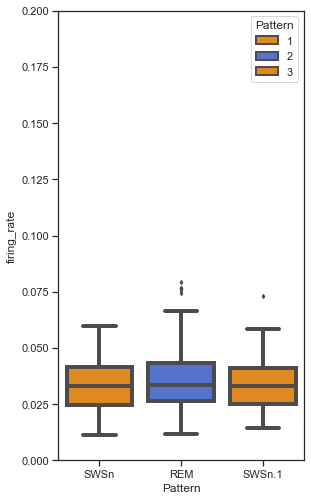

In [19]:
df_temp = pd.DataFrame()
df_temp = df_typ3_firing.melt(id_vars=['name', 'Pattern', 'epochID'], value_name='firing_rate')
#x=df_temp.groupby(["name","Pattern","subEpoch"], as_index=False).agg({"firing_rate": np.mean})
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#g=sns.boxplot(x="Pattern", y="firing_rate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','limegreen','darkorange'],data=x )
g=sns.boxplot(x="Pattern", y="firing_rate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','royalblue','darkorange'],data=df_temp )

#g=sns.lineplot(x="Pattern", y="firing_rate",linewidth=6,color='black',data=x )
g.set_xticklabels(['SWSn','REM','SWSn.1'])
plt.ylim(0,0.2)
#plt.ylim(-2,2)

#plt.ylim(0.05,0.07)
#if save_file:
   # df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr_z_score/sws_rem_sws/all_cells/Type3_fr.csv')
    #    df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/prova.csv')

#if save_fig:
  #  plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr_z_score/all_mice_sws_rem_sws/all_cells/Type3_fr_boxplot_all_cells_sws_rem_sws.pdf', dpi=600, format='pdf')

#### Frequency based on top x% of first element of pattern

In [20]:
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()

    
for i, data_dict in enumerate(data_list):
    if not isinstance(data_dict['type3'], int):
        df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[data_dict['type3'][0]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['top20_avg_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[data_dict['type3'][1]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['top20_avg_firing'][0]])],
                                                             'Third':[np.nanmean(data_list[data_dict['type3'][2]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['top20_avg_firing'][0]])],
                                                             'name':data_dict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    

C:\Users\admin\AppData\Local\Temp/ipykernel_3684/1959753766.py:8: RuntimeWarning: Mean of empty slice
  df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[data_dict['type3'][0]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['top20_avg_firing'][0]])],
C:\Users\admin\AppData\Local\Temp/ipykernel_3684/1959753766.py:9: RuntimeWarning: Mean of empty slice
  'Second':[np.nanmean(data_list[data_dict['type3'][1]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['top20_avg_firing'][0]])],
C:\Users\admin\AppData\Local\Temp/ipykernel_3684/1959753766.py:10: RuntimeWarning: Mean of empty slice
  'Third':[np.nanmean(data_list[data_dict['type3'][2]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['top20_avg_firing'][0]])],


(0.0, 0.2)

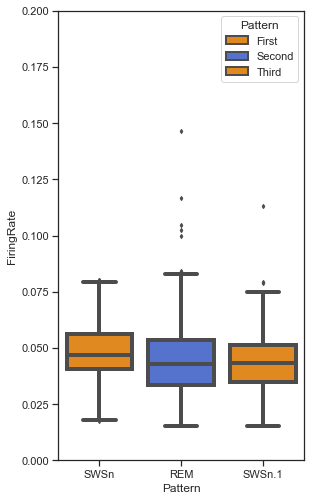

In [21]:
df_temp = pd.DataFrame()
df_temp = df_typ3_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','limegreen','darkorange'],data=df_temp )
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','royalblue','darkorange'],data=df_temp )

#g=sns.lineplot(x="Pattern", y="firing_rate",linewidth=6,color='black',data=x )
g.set_xticklabels(['SWSn','REM','SWSn.1'])
#plt.ylim(-2,2)
plt.ylim(0,0.2)
#if save_file:
    #df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/all_cells/Type3_fr_top20_active_during_swsn.csv')
   # df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr_z_score/sws_rem_sws/all_cells/Type3_fr_top20_active_during_swsn.csv')
#if save_fig:
 #   #plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/all_cells/Type3_fr_top20_active_during_swsn.pdf', dpi=600, format='pdf')
  #  plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr_z_score/all_mice_sws_rem_sws/all_cells/Type3_fr_top20_active_during_swsn.pdf', dpi=600, format='pdf')


#### Frequency based on least x% of first element of pattern

In [22]:
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()

    
for i, data_dict in enumerate(data_list):
    if not isinstance(data_dict['type3'], int):
        df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[data_dict['type3'][0]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['least20_avg_firing'][0]])],
                                                             'Second':[np.nanmean(data_list[data_dict['type3'][1]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['least20_avg_firing'][0]])],
                                                             'Third':[np.nanmean(data_list[data_dict['type3'][2]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['least20_avg_firing'][0]])],
                                                             'name':data_dict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    

C:\Users\admin\AppData\Local\Temp/ipykernel_3684/1884399050.py:8: RuntimeWarning: Mean of empty slice
  df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[data_dict['type3'][0]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['least20_avg_firing'][0]])],
C:\Users\admin\AppData\Local\Temp/ipykernel_3684/1884399050.py:9: RuntimeWarning: Mean of empty slice
  'Second':[np.nanmean(data_list[data_dict['type3'][1]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['least20_avg_firing'][0]])],
C:\Users\admin\AppData\Local\Temp/ipykernel_3684/1884399050.py:10: RuntimeWarning: Mean of empty slice
  'Third':[np.nanmean(data_list[data_dict['type3'][2]]['avg_firing_perSecond'][data_list[data_dict['type3'][0]]['least20_avg_firing'][0]])],


(0.0, 0.2)

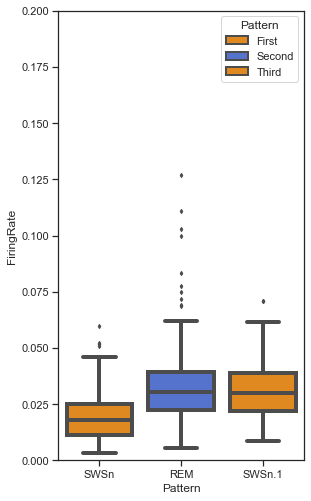

In [23]:
df_temp = pd.DataFrame()
df_temp = df_typ3_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','limegreen','darkorange'],data=df_temp )
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','royalblue','darkorange'],data=df_temp )

#g=sns.lineplot(x="Pattern", y="firing_rate",linewidth=6,color='black',data=x )
g.set_xticklabels(['SWSn','REM','SWSn.1'])
#plt.ylim(-2,2)
plt.ylim(0,0.2)
#if save_file:
    #df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/all_cells/Type3_fr_least20_active_during_swsn.csv')
  #  df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr_z_score/sws_rem_sws/all_cells/Type3_fr_least20_active_during_swsn.csv')
#if save_fig:
    #plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/all_cells/Type3_fr_least20_active_during_swsn.pdf', dpi=600, format='pdf')
   # plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr_z_score/all_mice_sws_rem_sws/all_cells/Type3_fr_least20_active_during_swsn.pdf', dpi=600, format='pdf')

#### Frequency based on top 

In [102]:
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()


for i, indDict in enumerate (data_list):
    if not isinstance(indDict['type3'], int):
        for ii in range(3):
            df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'FiringRate':[np.nanmean(data_list[indDict['type3'][ii]]['avg_firing_perSecond_zscore'][data_list[indDict['type3'][ii]]['top20_avg_firing_zscore'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii + 1, 
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\AppData\Local\Temp/ipykernel_7468/2391778858.py:9: RuntimeWarning: Mean of empty slice
  df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'FiringRate':[np.nanmean(data_list[indDict['type3'][ii]]['avg_firing_perSecond_zscore'][data_list[indDict['type3'][ii]]['top20_avg_firing_zscore'][0]])],


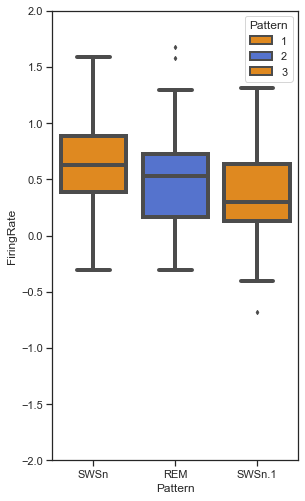

In [103]:
#df_temp = pd.DataFrame()
#df_temp = df_typ3_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','limegreen','darkorange'],data=df_typ3_firing )
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','royalblue','darkorange'],data=df_typ3_firing )

#g=sns.lineplot(x="Pattern", y="firing_rate",linewidth=6,color='black',data=x )
g.set_xticklabels(['SWSn','REM','SWSn.1'])
#plt.ylim(0,0.2)
plt.ylim(-2,2)

if save_file:
    #df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/all_cells/Type3_fr_top20_active_during_swsn.csv')
    df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr_z_score/sws_rem_sws/all_cells/Type3_fr_top20_active_total.csv')

if save_fig:
    #plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/all_cells/Type3_fr_top20_active_during_swsn.pdf', dpi=600, format='pdf')
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr_z_score/all_mice_sws_rem_sws/all_cells/Type3_fr_top20_active_total.pdf', dpi=600, format='pdf')

### Frequency based on least

In [106]:
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()


for i, indDict in enumerate (data_list):
    if not isinstance(indDict['type3'], int):
        for ii in range(3):
            df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'FiringRate':[np.nanmean(data_list[indDict['type3'][ii]]['avg_firing_perSecond_zscore'][data_list[indDict['type3'][ii]]['least20_avg_firing_zscore'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii + 1, 
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\AppData\Local\Temp/ipykernel_7468/3185973230.py:9: RuntimeWarning: Mean of empty slice
  df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'FiringRate':[np.nanmean(data_list[indDict['type3'][ii]]['avg_firing_perSecond_zscore'][data_list[indDict['type3'][ii]]['least20_avg_firing_zscore'][0]])],


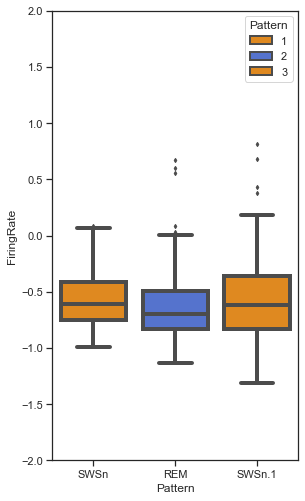

In [107]:
#df_temp = pd.DataFrame()
#df_temp = df_typ3_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','limegreen','darkorange'],data=df_typ3_firing )
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','royalblue','darkorange'],data=x )

#g=sns.lineplot(x="Pattern", y="firing_rate",linewidth=6,color='black',data=x )
g.set_xticklabels(['SWSn','REM','SWSn.1'])
#plt.ylim(0,0.2)
plt.ylim(-2,2)

if save_file:
    #df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/all_cells/Type3_fr_top20_active_during_swsn.csv')
    df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr_z_score/sws_rem_sws/all_cells/Type3_fr_least20_active_total.csv')
if save_fig:
    #plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/all_cells/Type3_fr_top20_active_during_swsn.pdf', dpi=600, format='pdf')
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr_z_score/all_mice_sws_rem_sws/all_cells/Type3_fr_least20_active_total.pdf', dpi=600, format='pdf')

### Triplet type 3 for RTM 

###  RTM top x%


In [ ]:
# RTM top x%
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()

    
for i, data_dict in enumerate(data_list):
    if not isinstance(data_dict['type3'], int):
        df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[data_dict['type3'][0]]["avg_firing_perSecond"][data_dict["type3_top20%_RTM"][0]])],
                                                             'Second':[np.nanmean(data_list[data_dict['type3'][1]]["avg_firing_perSecond"][data_dict["type3_top20%_RTM"][0]])],
                                                             'Third':[np.nanmean(data_list[data_dict['type3'][2]]["avg_firing_perSecond"][data_dict["type3_top20%_RTM"][0]])],
                                                             'name':data_dict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    

C:\Users\admin\AppData\Local\Temp/ipykernel_2328/694272402.py:10: RuntimeWarning: Mean of empty slice
  'Second':[np.nanmean(data_list[data_dict['type3'][1]]["avg_firing_perSecond"][data_dict["type3_top20%_RTM"][0]])],


(0.0, 0.2)

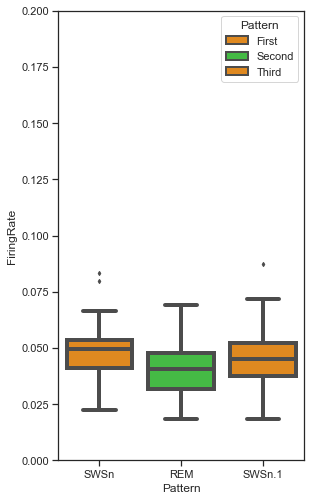

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_typ3_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
x = df_temp
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','limegreen','darkorange'],data=x )
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','royalblue','darkorange'],data=x )

#g=sns.lineplot(x="Pattern", y="firing_rate",linewidth=6,color='black',data=x )
g.set_xticklabels(['SWSn','REM','SWSn.1'])
plt.ylim(0,0.2)

#if save_file:
  #  df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/all_cells/RTM/Type3_fr_top20_active_during_swsn.csv')
    #df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/sws_rem_sws/all_cells/RTM/Type3_fr_top20_active_during_swsn.csv')
#if save_fig:
  #  plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/all_cells/RTM/Type3_fr_top20_active_during_swsn.pdf', dpi=600, format='pdf')
    #plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_rem_sws/all_cells/RTM/Type3_fr_top20_active_during_swsn.pdf', dpi=600, format='pdf')


###  RTM least x%


In [ ]:
# RTM least x%
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()

    
for i, data_dict in enumerate(data_list):
    if not isinstance(data_dict['type3'], int):
        df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'First':[np.nanmean(data_list[data_dict['type3'][0]]["avg_firing_perSecond"][data_dict["type3_least20%_RTM"][0]])],
                                                             'Second':[np.nanmean(data_list[data_dict['type3'][1]]["avg_firing_perSecond"][data_dict["type3_least20%_RTM"][0]])],
                                                             'Third':[np.nanmean(data_list[data_dict['type3'][2]]["avg_firing_perSecond"][data_dict["type3_least20%_RTM"][0]])],
                                                             'name':data_dict['mouseName'], 
                                                             'epochID': i}), ignore_index = True)
    

C:\Users\admin\AppData\Local\Temp/ipykernel_2328/395491542.py:10: RuntimeWarning: Mean of empty slice
  'Second':[np.nanmean(data_list[data_dict['type3'][1]]["avg_firing_perSecond"][data_dict["type3_least20%_RTM"][0]])],


(0.0, 0.2)

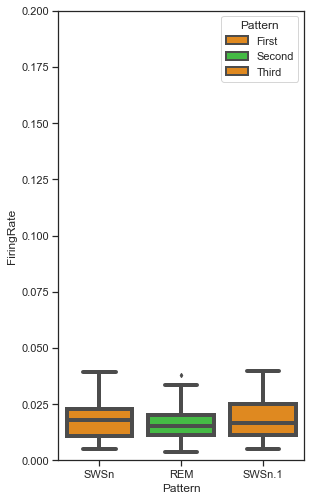

In [ ]:

df_temp = pd.DataFrame()
df_temp = df_typ3_firing.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='FiringRate')
x = df_temp
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','limegreen','darkorange'],data=x )
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,hue='Pattern',fliersize=3,linewidth=4,palette=['darkorange','royalblue','darkorange'],data=x )

#g=sns.lineplot(x="Pattern", y="firing_rate",linewidth=6,color='black',data=x )
g.set_xticklabels(['SWSn','REM','SWSn.1'])
plt.ylim(0,0.2)

#if save_file:
    #df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/all_cells/RTM/Type3_fr_least20_active_during_swsn.csv')
    #df_typ3_firing.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/sws_rem_sws/all_cells/RTM/Type3_fr_least20_active_during_swsn.csv')
#if save_fig:
   # plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/all_cells/RTM/Type3_fr_least20_active_during_swsn.pdf', dpi=600, format='pdf')
    #plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_rem_sws/all_cells/RTM/Type3_fr_least20_active_during_swsn.pdf', dpi=600, format='pdf')

### Divided in thirds

In [59]:
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()


for i, indDict in enumerate (data_list):
    if not isinstance(indDict['type3'], int):
        for ii in range(3):
            df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond_zscore'][0])], 
                                                                 '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond_zscore'][1])], 
                                                                 '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond_zscore'][2])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii+1, 
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\AppData\Local\Temp/ipykernel_7468/2732365579.py:11: RuntimeWarning: Mean of empty slice
  '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond_zscore'][2])],
C:\Users\admin\AppData\Local\Temp/ipykernel_7468/2732365579.py:9: RuntimeWarning: Mean of empty slice
  df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond_zscore'][0])],
C:\Users\admin\AppData\Local\Temp/ipykernel_7468/2732365579.py:10: RuntimeWarning: Mean of empty slice
  '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond_zscore'][1])],


C:\Users\admin\Anaconda3\envs\sleep_project\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


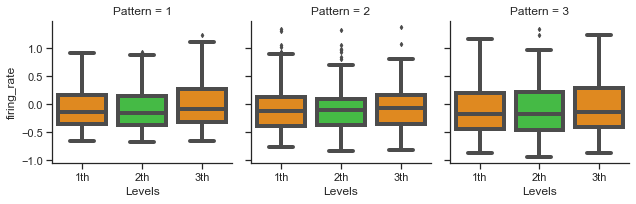

In [61]:
df_temp = pd.DataFrame()
df_temp = df_typ3_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='Levels', value_name='firing_rate')
df_temp
myGrid = sns.FacetGrid(data=df_temp, col='Pattern', col_wrap=3, aspect=1)

#myGrid = sns.FacetGrid(data=df_temp, col='Pattern', col_wrap=3, aspect=1, ylim=[0, 0.2])
#myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4, palette=['darkorange','royalblue','darkorange'])
myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4, palette=['darkorange','limegreen','darkorange'])

#### change address#####
#if save_file:
  #  df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/frontal_electrode/spindle_coupled/Type3_fr_boxplot_spindle_coupled_active_with_levels.csv')
#if save_fig:
  #  plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/frontal_electrode/spindle_coupled/Type3_fr_boxplot_spindle_coupled_active_with_levels.pdf', dpi=600, format='pdf')

#### Frequency based on top x% divided to n

In [ ]:
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if not isinstance(indDict['type3'], int):
        for ii in range(3):
            df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type3'][ii]]['top20_avg_firing'][0]])], 
                                                                 '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type3'][ii]]['top20_avg_firing'][0]])], 
                                                                 '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type3'][ii]]['top20_avg_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii+1, 
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\AppData\Local\Temp/ipykernel_2328/3198537714.py:11: RuntimeWarning: Mean of empty slice
  '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type3'][ii]]['top20_avg_firing'][0]])],
C:\Users\admin\AppData\Local\Temp/ipykernel_2328/3198537714.py:9: RuntimeWarning: Mean of empty slice
  df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type3'][ii]]['top20_avg_firing'][0]])],
C:\Users\admin\AppData\Local\Temp/ipykernel_2328/3198537714.py:10: RuntimeWarning: Mean of empty slice
  '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type3'][ii]]['top20_avg_firing'][0]])],


C:\Users\admin\Anaconda3\envs\sleep_project\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


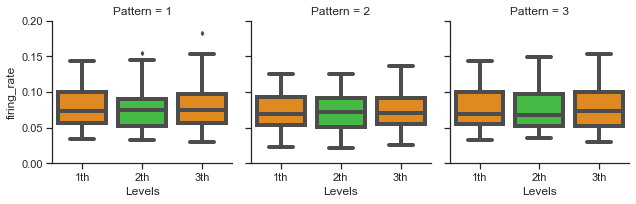

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_typ3_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='Levels', value_name='firing_rate')
df_temp
myGrid = sns.FacetGrid(data=df_temp, col='Pattern', col_wrap=3, aspect=1, ylim=[0, 0.2])
#myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4, palette=['darkorange','royalblue','darkorange'])
myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4, palette=['darkorange','limegreen','darkorange'])

#### change address#####
#if save_file:
  #  df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/frontal_electrode/spindle_coupled/Type3_fr_boxplot_spindle_coupled_active_with_levels.csv')
#if save_fig:
  #  plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/frontal_electrode/spindle_coupled/Type3_fr_boxplot_spindle_coupled_active_with_levels.pdf', dpi=600, format='pdf')

#### Frequency based on least x% divided to n

In [ ]:
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()


for i, indDict in enumerate(data_list):
    if not isinstance(indDict['type3'], int):
        for ii in range(3):
            df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type3'][ii]]['least20_avg_firing'][0]])], 
                                                                 '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type3'][ii]]['least20_avg_firing'][0]])], 
                                                                 '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type3'][ii]]['least20_avg_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii+1, 
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\AppData\Local\Temp/ipykernel_2328/1058172240.py:11: RuntimeWarning: Mean of empty slice
  '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type3'][ii]]['least20_avg_firing'][0]])],
C:\Users\admin\AppData\Local\Temp/ipykernel_2328/1058172240.py:9: RuntimeWarning: Mean of empty slice
  df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type3'][ii]]['least20_avg_firing'][0]])],
C:\Users\admin\AppData\Local\Temp/ipykernel_2328/1058172240.py:10: RuntimeWarning: Mean of empty slice
  '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type3'][ii]]['least20_avg_firing'][0]])],


C:\Users\admin\Anaconda3\envs\sleep_project\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


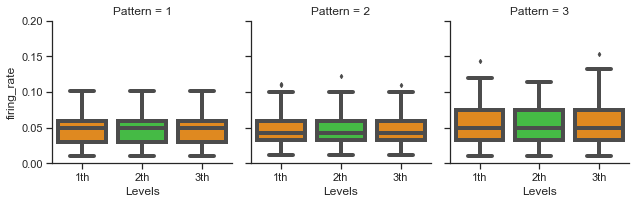

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_typ3_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='Levels', value_name='firing_rate')
df_temp
myGrid = sns.FacetGrid(data=df_temp, col='Pattern', col_wrap=3, aspect=1, ylim=[0, 0.2])
#myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4, palette=['darkorange','royalblue','darkorange'])
myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4, palette=['darkorange','limegreen','darkorange'])

#### change address#####
#if save_file:
  #  df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/frontal_electrode/spindle_coupled/Type3_fr_boxplot_spindle_coupled_active_with_levels.csv')
#if save_fig:
  #  plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/frontal_electrode/spindle_coupled/Type3_fr_boxplot_spindle_coupled_active_with_levels.pdf', dpi=600, format='pdf')

#### Frequency based on top x% of first element divided to n


In [ ]:
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()


for i,indDict in enumerate (data_list):
    if not isinstance(indDict['type3'], int):
        for ii in range(3):
            df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type3'][0]]['top20_avg_firing'][0]])], 
                                                                 '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type3'][0]]['top20_avg_firing'][0]])], 
                                                                 '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type3'][0]]['top20_avg_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii+1,
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\AppData\Local\Temp/ipykernel_2328/1041460652.py:11: RuntimeWarning: Mean of empty slice
  '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type3'][0]]['top20_avg_firing'][0]])],
C:\Users\admin\AppData\Local\Temp/ipykernel_2328/1041460652.py:9: RuntimeWarning: Mean of empty slice
  df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type3'][0]]['top20_avg_firing'][0]])],
C:\Users\admin\AppData\Local\Temp/ipykernel_2328/1041460652.py:10: RuntimeWarning: Mean of empty slice
  '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type3'][0]]['top20_avg_firing'][0]])],


C:\Users\admin\Anaconda3\envs\sleep_project\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


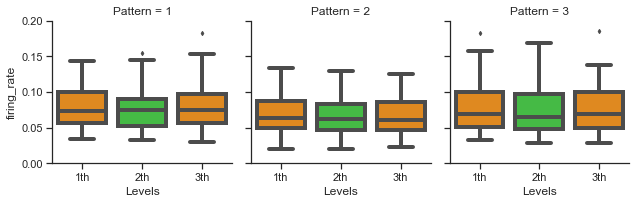

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_typ3_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='Levels', value_name='firing_rate')
df_temp
myGrid = sns.FacetGrid(data=df_temp, col='Pattern', col_wrap=3, aspect=1, ylim=[0, 0.2])
#myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4, palette=['darkorange','royalblue','darkorange'])
myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4, palette=['darkorange','limegreen','darkorange'])

#### change address#####
#if save_file:
  #  df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/frontal_electrode/spindle_coupled/Type3_fr_boxplot_spindle_coupled_active_with_levels.csv')
#if save_fig:
  #  plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/frontal_electrode/spindle_coupled/Type3_fr_boxplot_spindle_coupled_active_with_levels.pdf', dpi=600, format='pdf')

#### Frequency based on least x% of first element divided to n

In [ ]:
# plotting average firing rate 

df_typ3_firing = pd.DataFrame()


for i,indDict in enumerate (data_list):
    if not isinstance(indDict['type3'], int):
        for ii in range(3):
            df_typ3_firing = df_typ3_firing.append(pd.DataFrame({'1th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][0][data_list[indDict['type3'][0]]['least20_avg_firing'][0]])], 
                                                                 '2th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][1][data_list[indDict['type3'][0]]['least20_avg_firing'][0]])], 
                                                                 '3th':[np.nanmean(data_list[indDict['type3'][ii]]['div_avg_firing_perSecond'][2][data_list[indDict['type3'][0]]['least20_avg_firing'][0]])], 
                                                                 'name':indDict['mouseName'], 
                                                                 'Pattern': ii+1,
                                                                 'epochID': i}), ignore_index = True)
    


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


C:\Users\admin\Anaconda3\envs\sleep_project\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


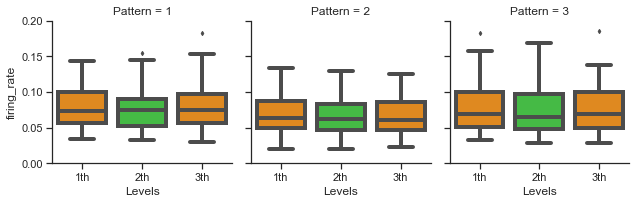

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_typ3_firing.melt(id_vars=['name', 'Pattern', 'epochID'], var_name='Levels', value_name='firing_rate')
df_temp
myGrid = sns.FacetGrid(data=df_temp, col='Pattern', col_wrap=3, aspect=1, ylim=[0, 0.2])
#myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4, palette=['darkorange','royalblue','darkorange'])
myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4, palette=['darkorange','limegreen','darkorange'])

#### change address#####
#if save_file:
  #  df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type3_fr/900-10000frames_sws_awake_sws/frontal_electrode/spindle_coupled/Type3_fr_boxplot_spindle_coupled_active_with_levels.csv')
#if save_fig:
  #  plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type3_fr/all_mice_sws_awake_sws_900_10000/frontal_electrode/spindle_coupled/Type3_fr_boxplot_spindle_coupled_active_with_levels.pdf', dpi=600, format='pdf')

### Read and write data as JSON file

In [ ]:
with open('I:/Marco/analysis_nima/allData_JSON/fullData_with_analyses.json', 'w') as wr:
    json.dump(data_list , wr, cls=NumpyEncoder)

In [ ]:
with open(r"I:/Marco/analysis_nima/allData_JSON/fullData_with_analyses.json", "r") as read_file:
    data_list = json.load(read_file)

In [ ]:
# change lists to array
[data_dict.update({key: np.asarray(data_dict[key])}) for data_dict in data_list for key in data_dict.keys() if isinstance(data_dict[key], list)];